<a href="https://colab.research.google.com/github/IsabellaGarciaS/Biosignals/blob/main/P5_G2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head><p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='black'> <center>
       Bioseñales y Sistemas </center></font></h1>
<p3><center><b><font color='black' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>
<h2><font color='black'> <center>
Práctica 5 - Introducción al análisis frecuencial de señales</center></font></h2>
<h3><font color='black'> <center>
Danna Isabella Garcia Saenz - Solanlly Evenedy Montoya Rivera </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1></head>

# **3.1 Señales en tiempo discreto**

La mayoría de las señales de origen fisiológico son de naturaleza analógica, en tiempo continuo, aunque para su análisis por computador han de ser digitalizadas y convertidas a señales en tiempo discreto de valores cuantificados o discretos. Si queremos digitalizar la señal analógica 𝑥𝑎(𝑡) para ser procesada y analizada en computador debemos tomar muestras representativas de la señal continua a través del muestreo de la señal.
Muestrear una señal continua (analógica) consiste en remplazar la señal por sus valores en un conjunto de puntos discretos. Comúnmente, estos instantes de muestreo se distribuyen en intervalos regulares de tiempo, llamado muestreo periódico. Podemos describir esta operación matemáticamente como 𝑥(𝑛)=𝑥𝑎(𝑛𝑇),−∞≤𝑛≤∞ , donde 𝑥(𝑛) es la señal en tiempo discreto obtenida tomando muestras de la señal analógica 𝑥𝑎(𝑡) cada 𝑇 segundos. El intervalo de tiempo 𝑇 entre muestras sucesivas se llama período de muestreo o intervalo de muestreo y su inverso 1/𝑇=𝐹𝑠 se denomina frecuencia de muestreo (en muestras por segundo o Hz).

**3.2 Representación de señales**

Como ejemplo de señal discreta utilizaremos la señal analógica 𝑥𝑎(𝑡)=𝐴𝑠𝑖𝑛(2𝜋𝐹0𝑡) con 𝐹0=40𝐻𝑧 (frecuencia fundamental de la señal), 𝐴=5𝑉 (amplitud), y muestreada a 𝐹𝑠=1000𝐻𝑧 (𝑇=0.001𝑠). Definamos estos parámetros en Python y tomemos un ciclo de la señal muestreada:

In [1]:
#Librerias
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import welch as pwelch
import os

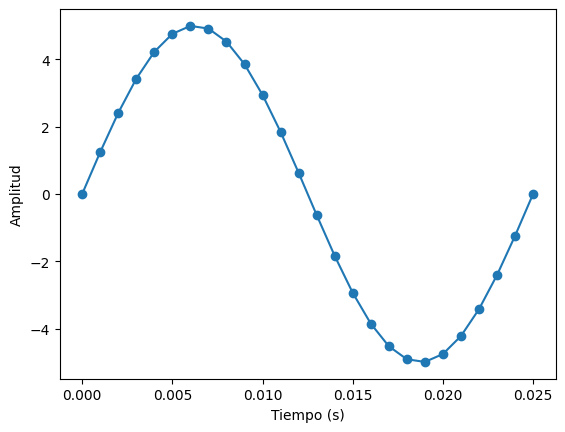

In [2]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

Se observa claramente que el periodo de la señal analógica o en tiempo continuo es 𝑇𝑝=0,025𝑠. Una manera alternativa de crear la señal 𝑥(𝑛) sería:

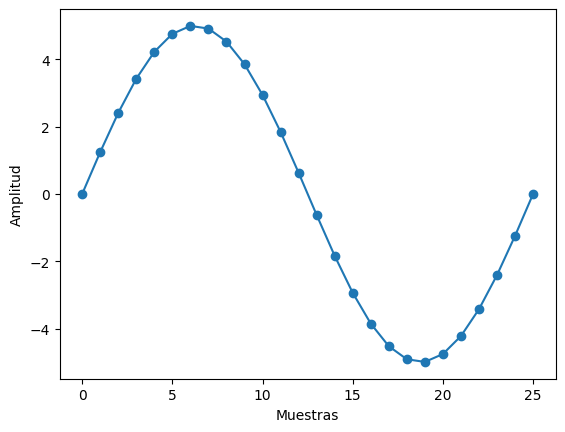

In [3]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

En este caso se observa claramente que el periodo de la señal en tiempo discreto es 𝑁=25 muestras. La señal 𝑥1(𝑛) se ha generado mediante la pulsación de oscilación en tiempo discreto 𝑓0=0,04 muestras/s. La única diferencia respecto al anterior es que en este último caso el período de muestreo 𝑇 “manipula” la pulsación original 𝐹0 y se considera como eje temporal la sucesión de números enteros correspondiente a los instantes de muestreo.
En todo caso, el resultado es el mismo, pues gráficamente se observa que ambas señales 𝑥(𝑡) y 𝑥1(𝑛) coinciden, la única diferencia radica en que la evolución de las muestras se escala con la abscisa de tiempo en segundos 𝑡 ϵ R en el primer caso, y con la abscisa de número de muestras 𝑛 ϵ N en el segundo caso.

**a)
Compruebe que los valores de las primeras cinco muestras son los mismos**

In [4]:
muestras_x = [x[i] for i in range(0,5)]
muestras_x1 = [x1[i] for i in range(0,5)]

print("Los valores de las primeras 5 muestras para x son: "+str(muestras_x))
print("Los valores de las primeras 5 muestras para x1 son: "+str(muestras_x1))


Los valores de las primeras 5 muestras para x son: [0.0, 1.243449435824274, 2.4087683705085765, 3.4227355296434436, 4.221639627510076]
Los valores de las primeras 5 muestras para x1 son: [0.0, 1.243449435824274, 2.4087683705085765, 3.4227355296434436, 4.221639627510076]


Otra manera de graficar las señales muestreadas es mediante la función stem:

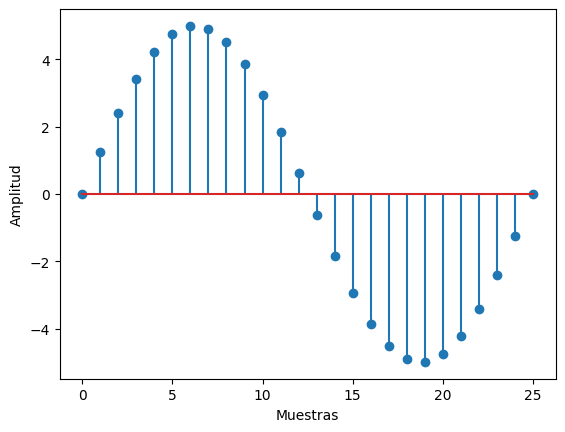

In [5]:
plt.stem(n, x1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

**3.3 Energía y potencia en el dominio del tiempo**

La energía, medida en 𝑉2 ó 𝑊.𝑠 en un ciclo de la señal 𝑥(𝑛) se puede hallar de la siguiente manera:

In [6]:
energia = sum(x**2)
print(energia)

312.50000000000006


La potencia media de la señal medida en 𝑊 es:

In [7]:
potencia = energia/(len(t)-1)
print(potencia)

12.500000000000002


El valor cuadrático medio es la raíz cuadrada de la potencia:

In [8]:
rms = np.sqrt(potencia)
print(rms)

3.5355339059327378


Para hallar la energía, así como la potencia media de la señal considerando 10 ciclos de la sinusoide (250ms):

In [9]:
t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)

In [10]:
print("La energia en 10 ciclos es: "+ str(energia10))
print("La potencia en 10 ciclos es: "+str(potencia10))
print("El valor cuadratico medio en 10 ciclos es: "+str(rms10))

La energia en 10 ciclos es: 3125.0000000000014
La potencia en 10 ciclos es: 12.500000000000005
El valor cuadratico medio en 10 ciclos es: 3.535533905932738


b)La potencia es la misma que en 𝑥(𝑛). ¿Por qué?

Como se puede observar, la potencia calculada en ambas señales, tanto en 𝑥(𝑛) como en 𝑥10(𝑛), es la misma. Esto es debido a que la potencia de una señal periódica no cambia si se considera un número entero de periodos. Es decir que la potencia de una señal periódica es constante en el tiempo si se toma un número entero de periodos, es por eso que al considerar 10 ciclos completos de la sinusoide, estamos simplemente replicando la misma señal periódica 10 veces en un período de tiempo más largo. Dado que la señal es periódica, cada ciclo tiene la misma contribución a la potencia total, por lo tanto, la potencia total se mantiene constante.


**3.4 Análisis de Fourier en tiempo discreto**

La transformada Discreta de Fourier (o de forma abreviada, DFT, por sus siglas en inglés) de una señal 𝑥(𝑛) se calcula en Python mediante el comando np.fft.fft (ver el help de Python). Vamos a calcular la DFT de la señal

In [11]:
X10 = np.fft.fft(x10)

Se puede observar que la DFT obtenida tiene el mismo número de puntos como muestras tiene la señal 𝑋10(𝑛), 250 en total. El cálculo eficiente de la DFT se realiza mediante el algoritmo de la Fast Fourier Transform o FFT, cuyo comando en Python acabamos de utilizar, podemos representar los resultados:

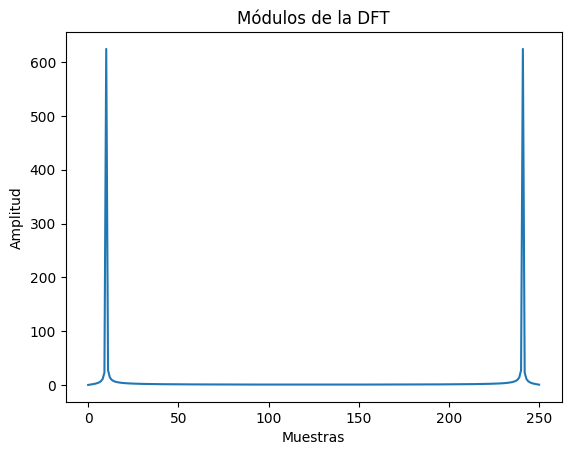

In [12]:
plt.plot(abs(X10))
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

Podemos observar que efectivamente la DFT tiene 250 puntos y que su módulo presenta simetría circularmente par (porque la señal 𝑥(𝑛) toma valores reales únicamente). También vemos que el valor máximo que toman los coeficientes es de 625.

Debemos tener en cuenta que la DFT 𝑋(𝑘) está relacionada con los coeficientes 𝑐𝑘 de la serie de Fourier de la señal 𝑥𝑝(𝑛), siendo 𝑥𝑝(𝑛) la que se obtendría por repetición de 𝑥(𝑛). Como 𝑥(𝑛) contiene un número entero de periodos, 𝑥𝑝(𝑛) es la señal sinusoidal originada de duración infinita, y entonces se cumple la relación 𝑋(𝑘)=𝑁.𝑐𝑘.


Es decir, hay un escalado por N (números de muestras, sin contabilizar los ceros añadidos que pudiera haber). La señal sinusoidal de amplitud unitaria tiene unos coeficientes de Fourier asociados a la frecuencia de oscilación 𝑐𝑘′=12 j es decir de módulo 0,5. Hay que tener en cuenta que la amplitud de 𝑥(𝑛) es 5 y por lo tanto los coeficientes de la señal 𝑥𝑝(𝑛) serán 5 .0,5=2,5. Entonces, 𝑋(𝑘)=𝑁.𝑐𝑘=250 .2,5=625 justo en la frecuencia de oscilación.


Como la señal 𝑥10(𝑛) con 0,25𝑠 de duración fue muestreada a 𝐹𝑠=1000𝐻𝑧 entonces los índices que representan los 250 valores de Fourier 𝑘 de 𝑋(𝑘) deben escalarse para llevarlos a escala de frecuencia 𝑓. Para ello simplemente hallamos 𝑓=𝑘/𝑁, siendo 𝑘=0…𝑁.


Sin embargo, si lo que nos interesa es relacionar directamente la DFT con las frecuencias 𝐹 de tiempo continuo para extraer información y conclusiones de la señal original 𝑥𝑎(𝑡), deberemos trabajar con 𝐹 = (𝑘.𝐹𝑠)/𝑁.

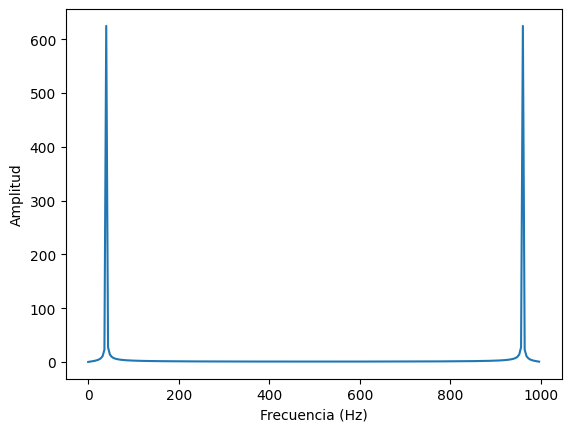

In [13]:
N = len(X10)
F = np.arange(0,N)*Fs/N
plt.plot(F,abs(X10))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

Aunque el comando de Python genera la DFT completa, habitualmente sólo se manipula y grafica la mitad de los puntos, los cuales van hasta la mitad de la frecuencia de muestreo, ya que por simetría la otra mitad se deduce fácilmente. Este valor “mitad” de la frecuencia de muestreo también recibe el nombre de frecuencia Nyquist.

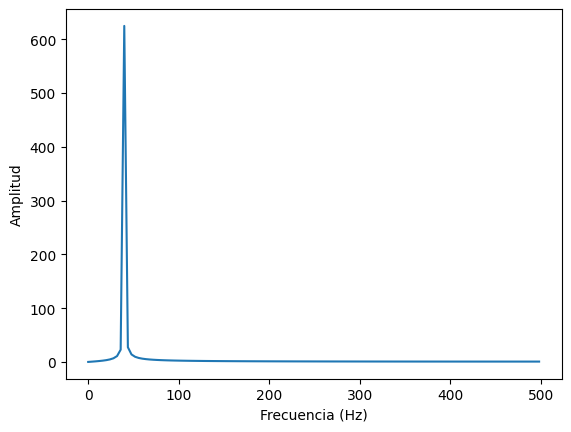

In [14]:
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = X10[0:Nmitad]
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()

Realizando un zoom se observa que la componente frecuencial se encuentra ubicada a 40 Hz.

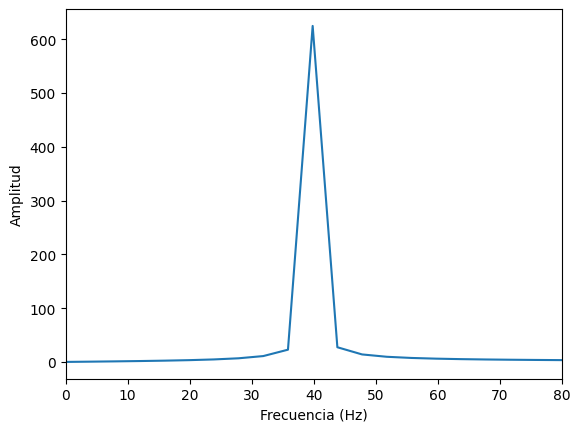

In [15]:
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,80)
plt.show()

**3.5 Periodogramas**

El análisis de frecuencia de señales discretas y finitas también puede llevarse a acabo a través de periodogramas que se calculan usando la transformada discreta de Fourier y una ventana corta centrada en un valor específico para estimar el contenido de potencia de las diferentes frecuencias en ese intervalo. Si la ventana es rectangular se habla de periodograma y si la ventana es cualquier otra se habla de periodograma modificado.

Sin embargo, estimar el contenido de frecuencia en una señal de larga duración, a través de una sola ventana de corta duración, puede no dar cuenta real del comportamiento de la señal. Como alternativa se tiene lo periodogramas por el método de Welch donde se calcula la densidad espectral de potencia en una ventana que se desplaza a lo largo de la señal, y finalmente se promedian los espectros de potencia para obtener un periodograma de Welch.

Ejemplo en Python para una señal cualquiera


In [16]:
#from scipy.signal import welch as pwelch

#Usando welch
#fs = 1000 #frecuencia de muestro
#nperseg = 2000 #Ancho de la ventana
#noverlap = int(nperseg/2) #solapamiento de las ventanas
#f, Pxx = pwelch(senal[0,:],fs,'hanning', nperseg, noverlap)
#Graficamos frecuencias vs potencia
#plt.stem(f,Pxx)
#plt.xlabel('Frecuencia')
#plt.ylabel('Potencia')
#plt.xlim([0,50]) #Rango para el eje x
#plt.show()

# **4. APLICACIÓN (100%)**


**4.1**
Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente.



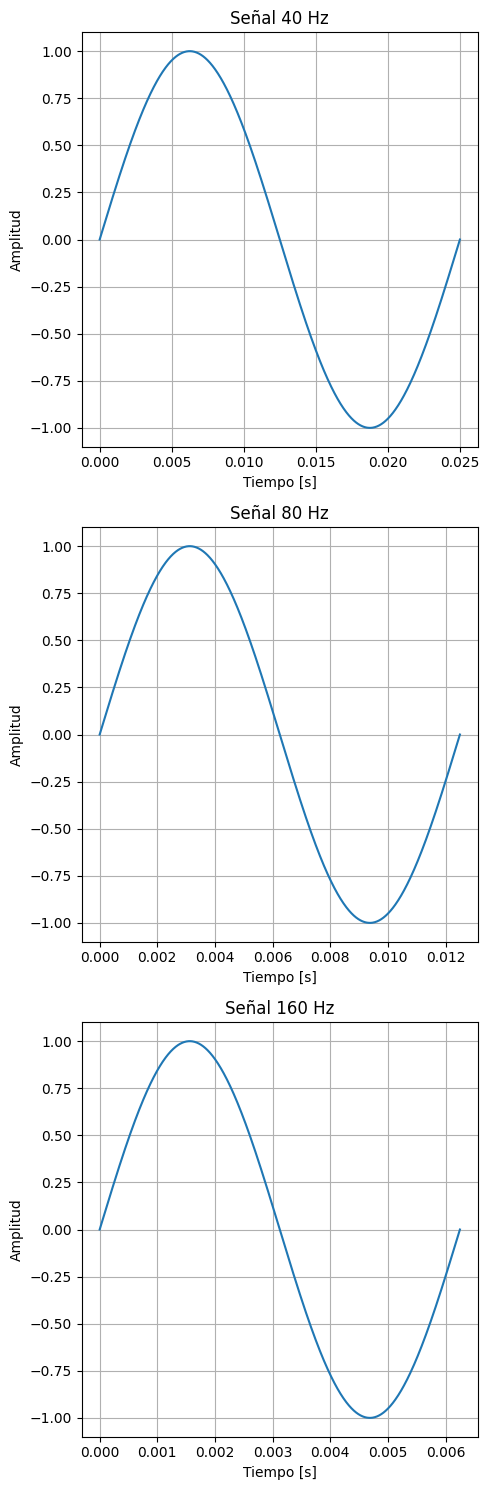

In [17]:
frequencies = [40, 80, 160] #frecuencias de las señales
fig, axs = plt.subplots(3, 1, figsize=(5, 15)) #crear figura y subplots

#genera y grafica cada señal en su subplot correspondiente
for i, freq in enumerate(frequencies):
    Fo = freq  #frecuencia fundamental de la señal
    Tp = 1 / Fo  #periodo de la señal

    t = np.linspace(0, Tp, num=1000) #vector de tiempo para un ciclo Tp + T con paso T
    signal = np.sin(2 * np.pi * freq * t) #generamos la señal correspondiente

    #grafica
    axs[i].plot(t, signal)
    axs[i].set_title('Señal {} Hz'.format(freq))
    axs[i].set_xlabel('Tiempo [s]')
    axs[i].set_ylabel('Amplitud')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

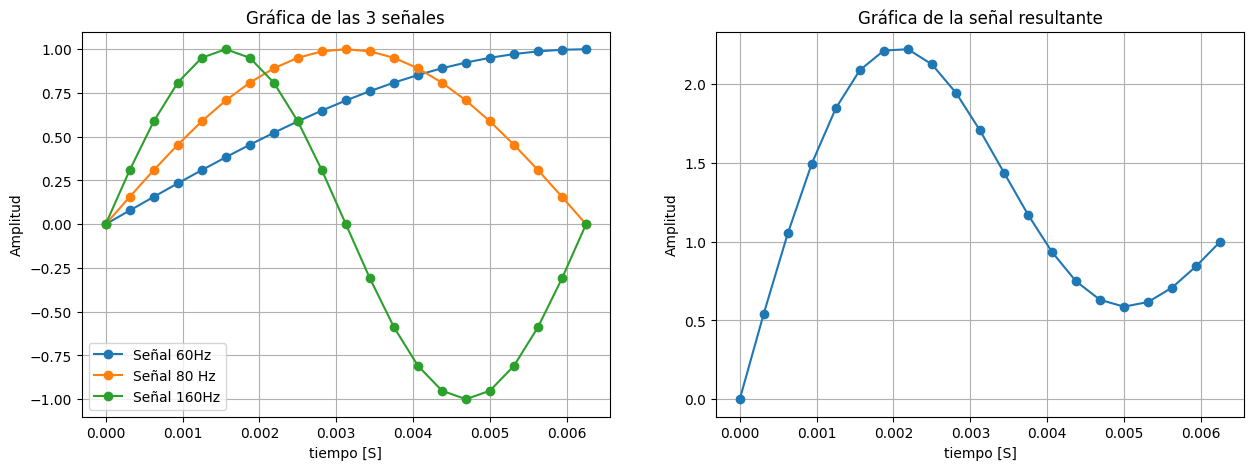

In [18]:
#la frecuencia fundamental de la señal será de 160Hz

Fo = 160 #frecuencia fundamental de la señal con mayor valor
Tp = 1 / Fo #periodo de la señal

#Por teorema de Nyquist se sabe que la frecuencia de muestreo debe ser
#mínimo 2 veces la fundamental, La razón detrás de esta elección particular de la
#frecuencia de muestreo es evitar el aliasing y garantizar una representación
#adecuada de las señales sinusoidales en el tiempo

Fs = 20* Fo #frecuencia de muestreo
#Si seguimos estrictamente el teorema de Nyquist, la frecuencia de muestreo
#mínima debería ser 2×160Hz, es decir, 320 Hz, sin embargo para garantizar
#una representación adecuada de las componentes de frecuencia más alta y
#evitar posibles distorsiones en la señal resultante, se ha elegido una
#frecuencia de muestreo más alta,20×160 Hz

T = 1 / Fs #periodo de muestreo
t = np.arange(0, Tp + T, T) #vector de tiempo para un ciclo Tp + T con paso T:

# Se generan las señales
signal_1 = np.sin(2 * np.pi * 40 * t)
signal_2 = np.sin(2 * np.pi * 80 * t)
signal_3 = np.sin(2 * np.pi * 160 * t)

x_signal = signal_1 + signal_2 + signal_3 # Señal final(sumatoria de las sinusoidales)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5)) #parametros grafico

#grafico de las 3 señales
ax1.plot(t, signal_1, marker='o')
ax1.plot(t, signal_2, marker='o')
ax1.plot(t, signal_3, marker='o')
ax1.set_xlabel('tiempo [S]') #etiqueta de eje x
ax1.set_ylabel('Amplitud') #etiqueta de eje y
ax1.legend(["Señal 60Hz","Señal 80 Hz","Señal 160Hz"]) #leyenda
ax1.set_title("Gráfica de las 3 señales") #titulo
ax1.grid() #grid

#grafico de la señal resultado
ax2.plot(t, x_signal, marker='o') #grafico de la señal resultado
ax2.set_xlabel('tiempo [S]') #etiqueta de eje x
ax2.set_ylabel('Amplitud') #etiqueta de eje y
ax2.set_title("Gráfica de la señal resultante") #titulo
ax2.grid() #grid

plt.show()#Visualización

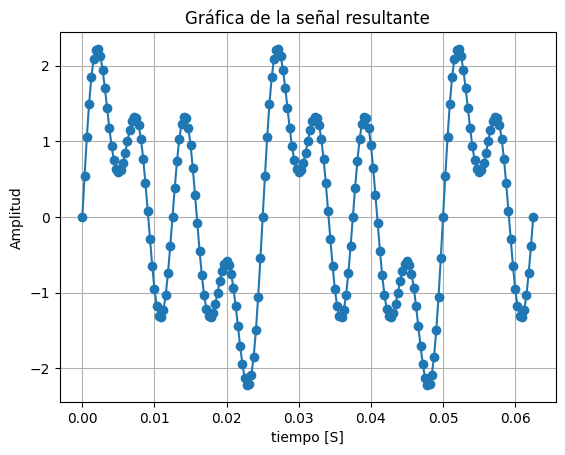

In [19]:
#para observar 10 ciclos de la señal
t_10 = np.arange(0, 10* Tp + T, T)

#se generan las señales
signal_1_10 = np.sin(2 * np.pi * 40 * t_10)
signal_2_10 = np.sin(2 * np.pi * 80 * t_10)
signal_3_10 = np.sin(2 * np.pi * 160 * t_10)

x_signal_10= signal_1_10 + signal_2_10 + signal_3_10 #señal final(sumatoria de las sinusoidales)


#grfico de la señal resultado
plt.plot(t_10, x_signal_10, marker='o')
plt.xlabel('tiempo [S]')  #etiquetas de eje x
plt.ylabel('Amplitud') #etiquetas de eje y
plt.title("Gráfica de la señal resultante") #titulo
plt.grid() #grid
plt.show() #Visualización

**4.2**
Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal)

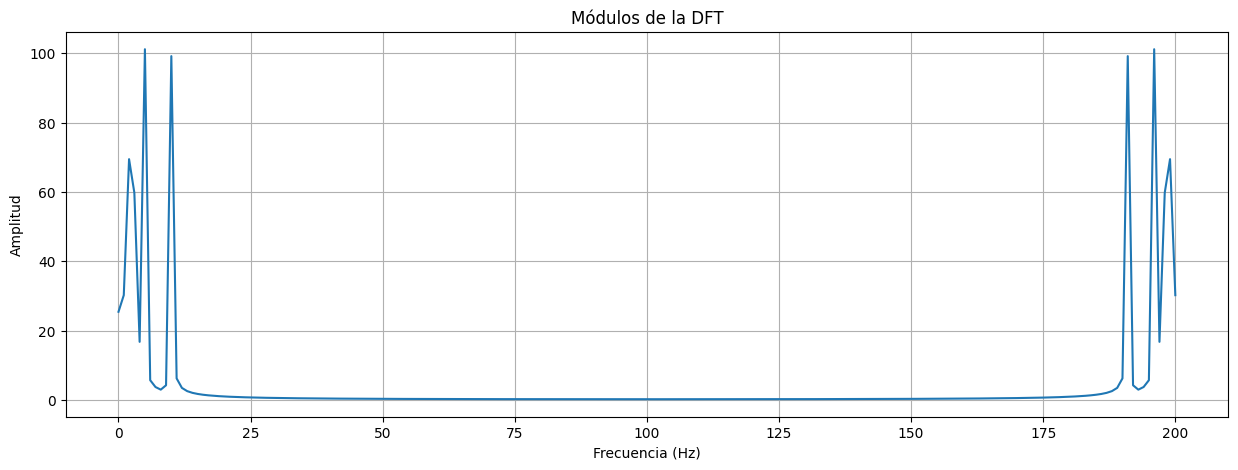

In [20]:
# Transformada de Fourier
transformada_f = np.fft.fft(x_signal_10)

#grafico de la señal resultado
plt.figure(figsize=(15,5))
plt.plot(abs(transformada_f))

plt.title('Módulos de la DFT') #titulo
plt.xlabel('Frecuencia (Hz)') #etiqueta de eje x
plt.ylabel('Amplitud')  #etiqueta de eje y
plt.grid() #grid
plt.show() #visualización

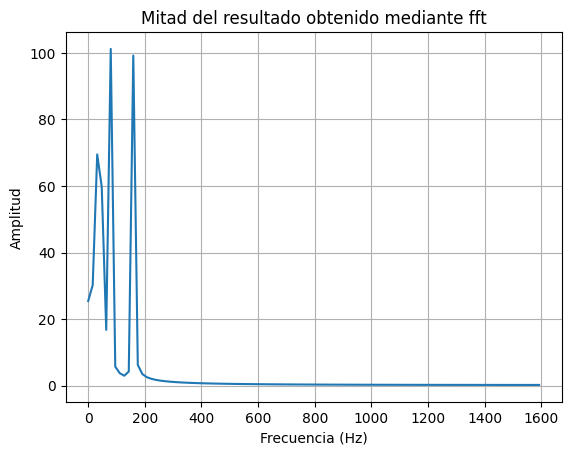

In [21]:
#se visualiza la mitad del espectro y se hace enfasis sobre las frecuencias de interés

#mitad del número total de muestras
N = len(x_signal_10)
N_mitad = int(np.ceil(N/2))

k_mitad = np.arange(0,N_mitad)  #valores k (k = 1,2,3,...(N/2))
f_mitad = (k_mitad * Fs) / N    #frecuencias (partición eje X)

x_10_mitad = transformada_f[0:N_mitad] #mitad de los valores de la tranformada

#grafico de la mitad de los valores de la fft
plt.plot(f_mitad, abs(x_10_mitad))
plt.title('Mitad del resultado obtenido mediante fft')  #titulo
plt.ylabel('Amplitud') #etiqueta para el eje y
plt.xlabel('Frecuencia (Hz)') #etiqueta para el eje x
plt.grid() #grid
plt.show() #visualización

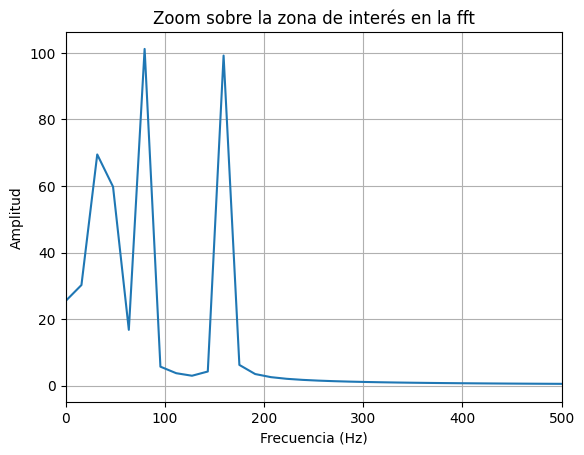

In [22]:
#grafico con más zoom sobre las frecuencias de interés
plt.plot(f_mitad, abs(x_10_mitad))

plt.title('Zoom sobre la zona de interés en la fft') #titulo
plt.ylabel('Amplitud') #etiqueta para eje y
plt.xlabel('Frecuencia (Hz)') #etiqueta para eje x
plt.grid()  #grid

plt.xlim(0,500) #limite de graficación
peaks, _ = find_peaks(abs(x_10_mitad), height=60)

plt.show() #visualización

**4.3**
Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior

La función que permite realizar el cálculo de la transformada inversa de Fourier es ifft,

**numpy.fft.ifft**(a, n=None, axis=-1, norm=None)

Esta función calcula la inversa de la transformada discreta de Fourier unidimensional de n puntos calculada por fft [1]

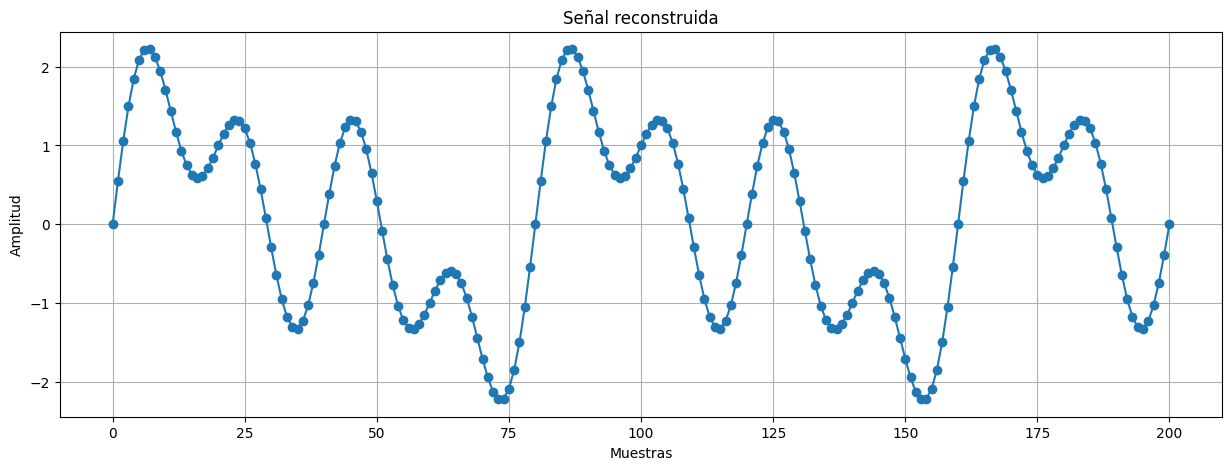

In [23]:
inv_fft = np.fft.ifft(transformada_f)
plt.figure(figsize=(15,5))
plt.title('Señal reconstruida')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.plot(inv_fft.real, marker= 'o')

**4.4**
¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?

```
F1 = np.fft.fft(x);
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()
```

Las anteriores líneas si aplican un filtro debido a que la primera línea realiza la transformada de Fourier y se eliminan todas las frecuencias que no correspondan al rango especificado en la tercera línea de código, correspondiendo a un filtro pasa bandas, debido a que sólo deja pasar las frecuencias que se encuentran en ese rango y el resto las elimina o las disminuye. Seguidamente se realiza la tranformada inversa de Fourier para reconstruir la señal únicamente con las componentes comprendidas en el rango de interés específicado anteriormente.

Finalmente, se grafica la parte real de la señal filtrada xr en función del tiempo.

**Extraiga de manera similar cada una de las componentes de la señal.**

<ipython-input-24-227e43e4eae5>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  pass_band[peaks[0]] = transformada_f[peaks[0]] #frecuencia de paso


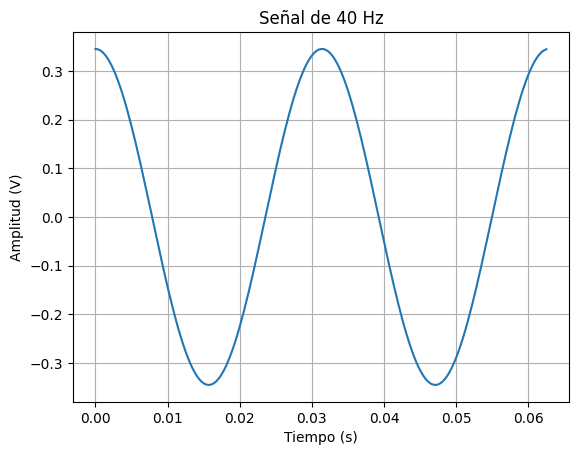

In [24]:
transformada_f = np.fft.fft(x_signal_10)

#filtro pasabandas en el primer pico
pass_band = np.zeros((len(transformada_f)))
pass_band[peaks[0]] = transformada_f[peaks[0]] #frecuencia de paso

x_reconstruct = np.fft.ifft(pass_band) #se reconstruye la señal

#Grafica
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_10, np.real(x_reconstruct))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)')
plt.title('Señal de 40 Hz')
plt.grid()
plt.show()

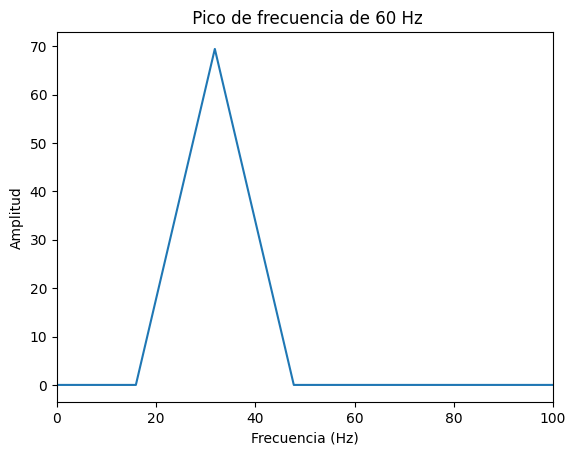

In [25]:
# Se aplica la tranformada sobre la señal hallada y se comprueba que el pico se encuentra sobre la frecuencia de interés

transformada_f = np.fft.fft(x_reconstruct)

N = len(x_reconstruct)
k = np.arange(0,N)
F = (k*Fs)/N
plt.plot(F,abs(transformada_f))
plt.title(' Pico de frecuencia de 60 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0,100)
plt.show()

<ipython-input-26-b7170a1d7110>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  pass_band[peaks[1]] = transformada_f[peaks[1]]


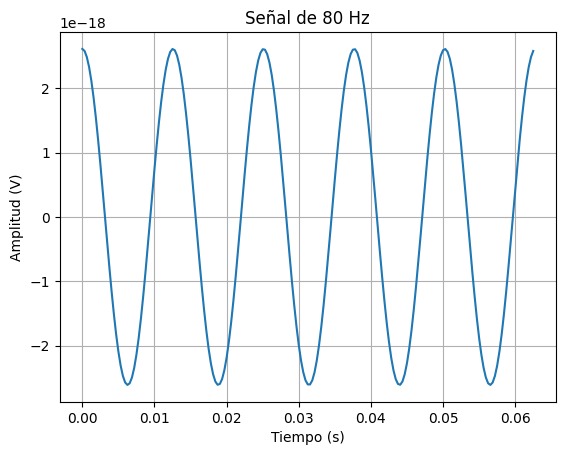

In [26]:
#filtro pasabandas en el segundo pico

pass_band = np.zeros((len(transformada_f)))
pass_band[peaks[1]] = transformada_f[peaks[1]]

x_reconstruct = np.fft.ifft(pass_band) #se reconstruye la señal

#grafica
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_10, np.real(x_reconstruct))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)')
plt.title('Señal de 80 Hz')
plt.grid()
plt.show()

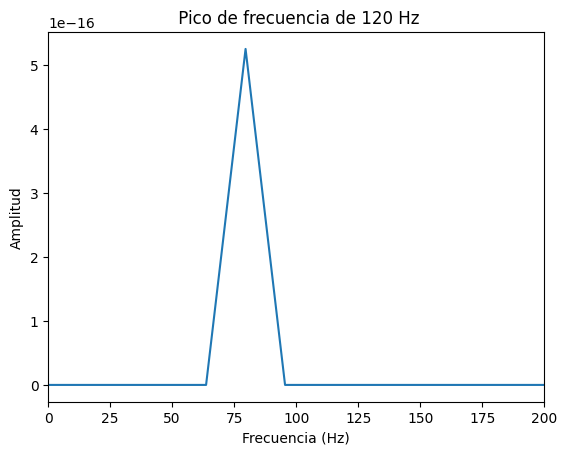

In [27]:
# Se aplica la tranformada sobre la señal hallada y se comprueba que el pico se encuentra sobre la frecuencia de interés

transformada_f = np.fft.fft(x_reconstruct)

N = len(x_reconstruct)
k = np.arange(0,N)
F = (k*Fs)/N
plt.plot(F,abs(transformada_f))
plt.title(' Pico de frecuencia de 120 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0,200)
plt.show()

<ipython-input-28-82f22bcd04bc>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  pass_band[peaks[2]] = transformada_f[peaks[2]]


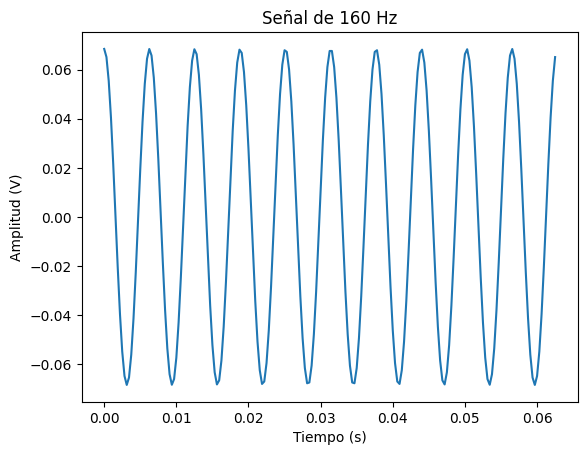

In [28]:
#filtro pasabandas en el tercer pico

transformada_f = np.fft.fft(x_signal_10)

pass_band = np.zeros((len(transformada_f))) #se reconstruye la señal

#grafica
pass_band[peaks[2]] = transformada_f[peaks[2]]
x_reconstruct = np.fft.ifft(pass_band)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_10, np.real(x_reconstruct))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)')
plt.title('Señal de 160 Hz')
plt.show()

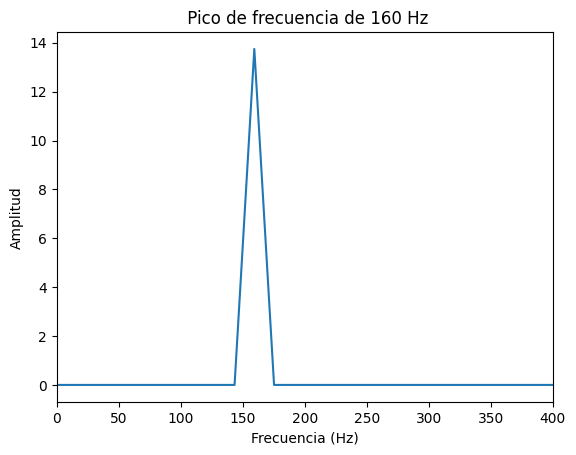

In [29]:
# Se aplica la tranformada sobre la señal hallada y se comprueba que el pico se encuentra sobre la frecuencia de interés

transformada_f = np.fft.fft(x_reconstruct)

N = len(x_reconstruct)
k = np.arange(0,N)
F = (k*Fs)/N
plt.plot(F,abs(transformada_f))
plt.title(' Pico de frecuencia de 160 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0,400)
plt.show()

**4.5**
El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import scipy.io as sio
data = sio.loadmat('/content/drive/MyDrive/Datos/senecg.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'ECG'])


In [32]:
ECG=data['ECG']
#características básicas de ndarray
print("Tipo de variable cargada: " + str(ECG.dtype));
print("Dimensiones de los datos cargados: " + str(ECG.shape));
print("Numero de dimensiones: " + str(ECG.ndim));
print("Tamanio: " + str(ECG.size));
print("Tamanio en memoria (bytes): " + str(ECG.nbytes));

Tipo de variable cargada: float64
Dimensiones de los datos cargados: (1250, 1)
Numero de dimensiones: 2
Tamanio: 1250
Tamanio en memoria (bytes): 10000


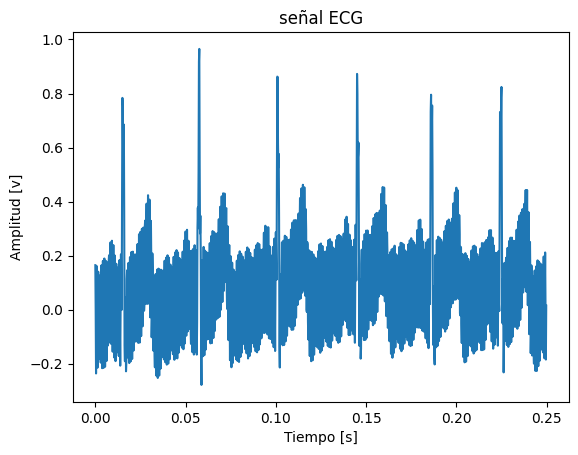

In [33]:
time=np.arange(0,len(ECG)/5000,1/5000)
plt.plot(time,ECG)
plt.title('señal ECG')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [v]')
plt.show()

In [34]:
ECG[:,0].shape

(1250,)

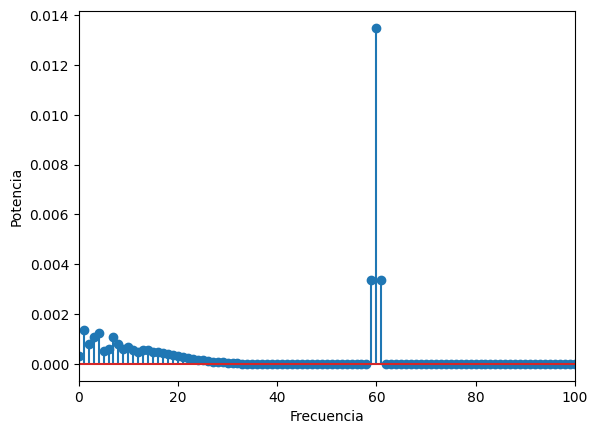

In [35]:
#parámetros para el análisis de Welch
fs = 250  #frecuencia de muestreo
nperseg = 250 #ancho de la ventana
noverlap = nperseg/2

#calcular el periodograma de Welch
f, Pxx = pwelch(ECG[:,0], fs,'hann',nperseg,noverlap)

#graficar frecuencias vs potencia
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 100])  # Rango para el eje x
plt.show()

Se escogio un ancho ventana de 250 ya que la señal tiene una frecuencia de muestreo 250 es decir que la duración de la señal es 5s ya que son 1250 puntos, esta eleccion garantiza una buena resolución temporal adecuada y aún permitiría una resolución espectral razonable, ya que con 250 puntos se garantiza que se tengan todas las frecuencias de interes.

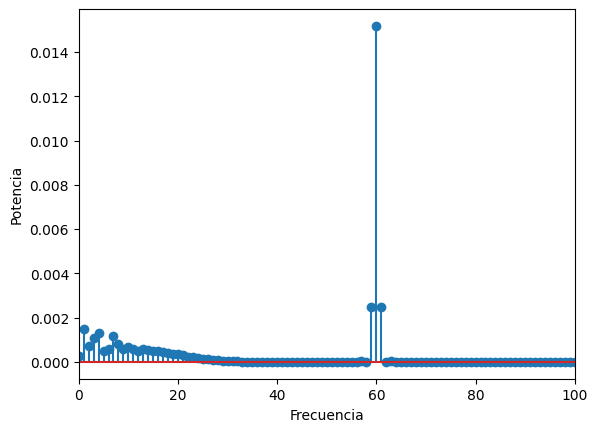

In [44]:
#parámetros para el análisis de Welch
fs = 250  #frecuencia de muestreo
nperseg = 250 #ancho de la ventana
noverlap = nperseg/2

#calcular el periodograma de Welch
f, Pxx = pwelch(ECG[:,0], fs,'bartlett',nperseg,noverlap)

#graficar frecuencias vs potencia
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 100])  # Rango para el eje x
plt.show()

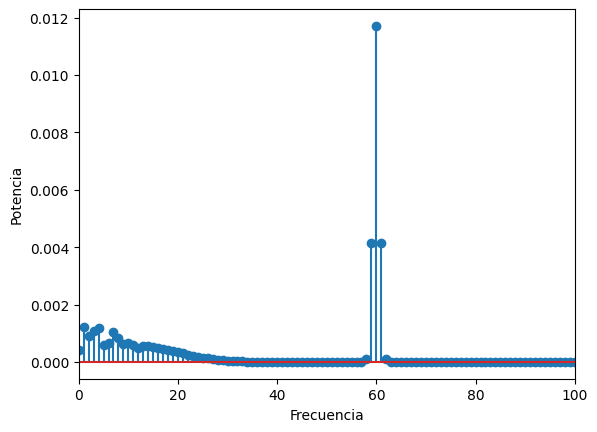

In [45]:
#parámetros para el análisis de Welch
fs = 250  #frecuencia de muestreo
nperseg = 250 #ancho de la ventana
noverlap = nperseg/2

#calcular el periodograma de Welch
f, Pxx = pwelch(ECG[:,0], fs,'blackman',nperseg,noverlap)

#graficar frecuencias vs potencia
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 100])  # Rango para el eje x
plt.show()

Se hicieron los graficos con las diferentes ventanas de Hann, Bartlett y Balckman par observar como las diferentes ventanas cambian las señal que se está observando. Como se pudieron observa en los graficos presentado, las ventanas Hann y Bartlett se ven muy iguales pero, los valores de la potencia de la ventana blackman si disminuyó.

In [36]:
noverlap

125.0

In [37]:
nperseg

250

**4.6**
Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)

In [38]:
#para descomprimir los archivos ZIP desde la carpeta datos al directorio de trabajo actual
!cp /content/drive/MyDrive/Datos/control.zip .
!unzip control.zip

Archive:  control.zip
 extracting: control/C001R_EP_reposo.mat  
 extracting: control/C002_EP_reposo.mat  
 extracting: control/C004_EP_reposo.mat  
 extracting: control/C005_EP_reposo_Repetido.mat  
 extracting: control/C006_EP_reposo.mat  
 extracting: control/C007_EP_reposo.mat  
 extracting: control/C010_EP_reposo.mat  
 extracting: control/C011_EP_reposo.mat  
 extracting: control/C012_EP_reposo.mat  
 extracting: control/C013_EP_reposo.mat  
 extracting: control/C015_EP_reposo.mat  
 extracting: control/C018_EP_reposo.mat  
 extracting: control/C019_EP_reposo.mat  
 extracting: control/C020_EP_reposo.mat  
 extracting: control/C021_EP_reposo.mat  
 extracting: control/C023_EP_reposo.mat  
 extracting: control/C024_EP_reposo.mat  
 extracting: control/C025_EP_reposo.mat  
 extracting: control/C026_EP_reposo.mat  
 extracting: control/C027_EP_reposo.mat  
 extracting: control/C028_EP_reposo.mat  
 extracting: control/C029_EP_reposo.mat  
 extracting: control/C030_EP_reposo.mat  
 e

In [39]:
!cp /content/drive/MyDrive/Datos/parkinson.zip .
!unzip parkinson.zip

Archive:  parkinson.zip
 extracting: parkinson/P001_EP_reposo.mat  
 extracting: parkinson/P004_EP_reposo.mat  
 extracting: parkinson/P005_EP_reposo.mat  
 extracting: parkinson/P007_EP_reposo.mat  
 extracting: parkinson/P012_EP_reposo.mat  
 extracting: parkinson/P013_EP_reposo.mat  
 extracting: parkinson/P015_EP_reposo.mat  
 extracting: parkinson/P016_EP_reposo.mat  
 extracting: parkinson/P017_EP_reposo.mat  
 extracting: parkinson/P018_EP_reposo.mat  
 extracting: parkinson/P020_EP_reposo.mat  
 extracting: parkinson/P025_EP_reposo.mat  
 extracting: parkinson/P026_EP_reposo.mat  
 extracting: parkinson/P028_EP_reposo.mat  
 extracting: parkinson/P030_EP_reposo.mat  
 extracting: parkinson/P032_EP_reposo.mat  
 extracting: parkinson/P033_EP_reposo.mat  
 extracting: parkinson/P034_EP_reposo.mat  
 extracting: parkinson/P040_EP_reposo.mat  
 extracting: parkinson/P041_EP_reposo.mat  
 extracting: parkinson/P046_EP_reposo.mat  
 extracting: parkinson/P048_EP_reposo.mat  
 extract

Dimensiones de los datos cargados: (8, 2000, 180)
Numero de dimensiones: 3
Tamanio: 2880000
Dimensiones de los datos cargados: (8, 360000)


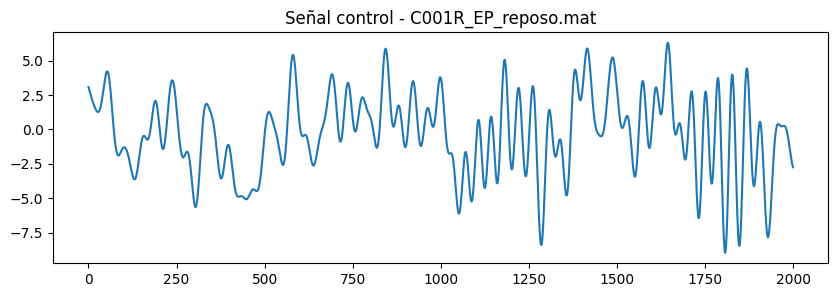

Dimensiones de los datos cargados: (8, 2000, 143)
Numero de dimensiones: 3
Tamanio: 2288000
Dimensiones de los datos cargados: (8, 286000)


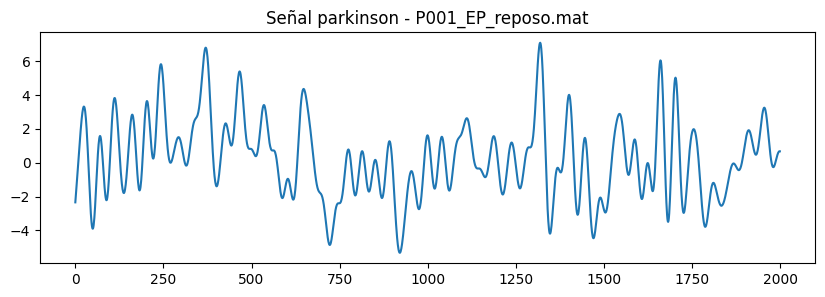

In [40]:
directorio_actual=os.getcwd() #devuelve una cadena de texto que contiene la ruta completa del directorio de trabajo actual a la variable directorio_actual
archivos_Control=os.listdir(directorio_actual + "/control") #aca seleccionamos las rutas de los pacientes

#ruta de un archivo
path_subjecti_control=(directorio_actual + "/control" + "/" + archivos_Control[19]) #variable con la ruta, con el primer archivo
#1 CARGAR EL ARCHIVO
data_control= sio.loadmat(path_subjecti_control)
#Buscamos la llave para poder llamarla
data_control.keys()

data_control=data_control['data']
data_control.shape

#características básicas de ndarray
print("Dimensiones de los datos cargados: " + str(data_control.shape));
print("Numero de dimensiones: " + str(data_control.ndim));
print("Tamanio: " + str(data_control.size));

#aca hacemos lo mismo que hace algunas lineas de reorganizar los datos
senal_continua_control= np.reshape(data_control,(data_control.shape[0],data_control.shape[1]*data_control.shape[2]),order='F')

#grafico señal control
print("Dimensiones de los datos cargados: " + str(senal_continua_control.shape));
fig = plt.figure(figsize=(10,3))
plt.plot(senal_continua_control[1,0:2000]) #nosotras escogimos un subconjunto de la matriz para la visualizacion para analizar
plt.title("Señal control - "+ archivos_Control[19])
plt.show()

#---------------

archivos_Parkinson=os.listdir(directorio_actual + "/parkinson")
#Ahora lo hacemos para los archivos de parkinson
path_subjecti_parkinson=(directorio_actual + "/parkinson" + "/" + archivos_Parkinson[8])
#1 CARGAR EL ARCHIVO
data_parkinson= sio.loadmat(path_subjecti_parkinson)
#Buscamos la llave para poder llamarla
data_parkinson.keys()

data_parkinson=data_parkinson['data']
data_parkinson.shape

#características básicas de ndarray
print("Dimensiones de los datos cargados: " + str(data_parkinson.shape));
print("Numero de dimensiones: " + str(data_parkinson.ndim));
print("Tamanio: " + str(data_parkinson.size));

senal_continua_parkinson= np.reshape(data_parkinson,(data_parkinson.shape[0],data_parkinson.shape[1]*data_parkinson.shape[2]),order='F') #reorganizamos los datos
senal_continua_parkinson.shape

#grafico señal parkison
print("Dimensiones de los datos cargados: " + str(senal_continua_parkinson.shape));
fig = plt.figure(figsize=(10,3))
plt.plot(senal_continua_parkinson[0,0:2000])
plt.title("Señal parkinson - "+ archivos_Parkinson[8])
plt.show()

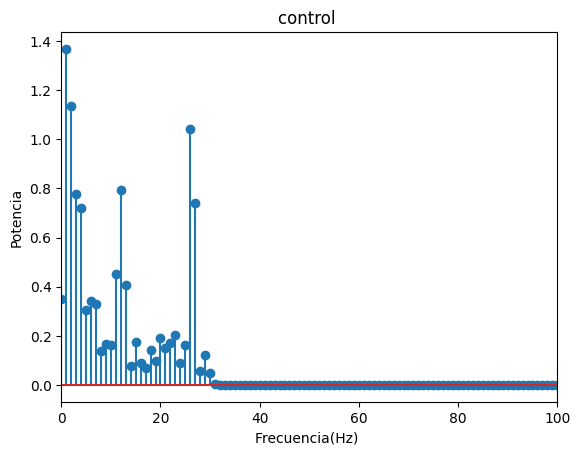

In [41]:
fs=1000
nperseg= 1000 #se los puntos en la ventana
noverlap= int(nperseg/2)  #se hace un solapamiento del 50%
fC, psdC = pwelch(data_control[0,:,0], fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap)   #se utiliza la funciòn welch para encontrar la densidad espectral
plt.stem(fC,psdC)
plt.title("control ")
plt.xlabel('Frecuencia(Hz) ')
plt.ylabel('Potencia')
plt.xlim([0,100])
plt.show()


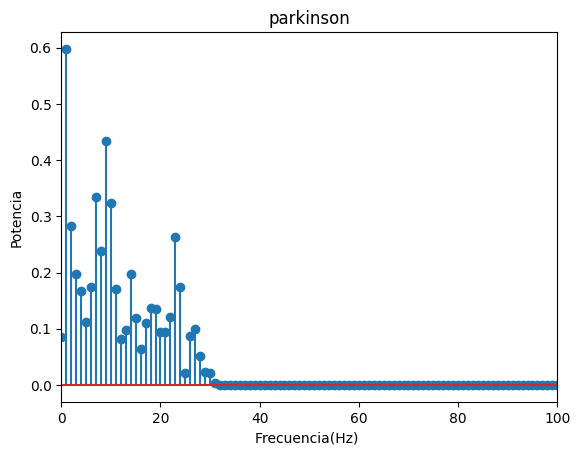

In [42]:
fs=1000
nperseg= 1000 #se los puntos en la ventana
noverlap= int(nperseg/2)  # se ahce un solapamiento del 50%
fP, psdP = pwelch(data_parkinson[0,:,0], fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap)   #se utiliza la funciòn welch para encontrar la densidad espectral
plt.stem(fP,psdP)
plt.title("parkinson")
plt.xlabel('Frecuencia(Hz) ')
plt.ylabel('Potencia')
plt.xlim([0,100])
plt.show()

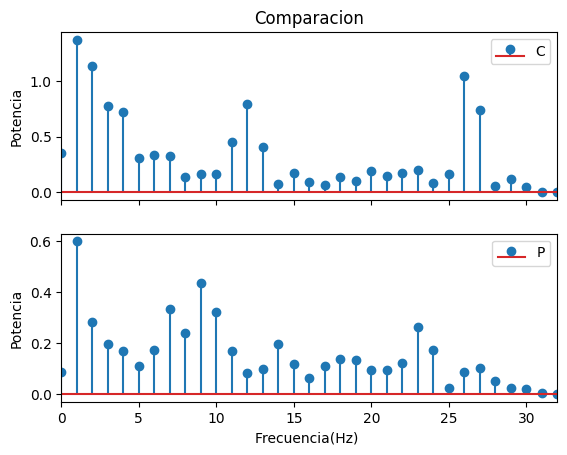

In [43]:
#crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

#grafica la señal original en el primer subplot
#x1,x2,x3
#ax1.plot(t,x3)
ax1.set_ylabel('Potencia')
ax1.set_title('Comparacion')
ax1.stem(fC,psdC)
plt.xlim([0,32])

#grafica la señal reconstruida en el segundo subplot
ax2.stem(fP,psdP)
ax2.set_xlabel('Frecuencia(Hz) ')
ax2.set_ylabel('Potencia')

ax1.legend("Control")
ax2.legend("Parkinson")
plt.show() #mostrar la figura

Se seleccionó una ventana de 1000 puntos para realizar el análisis de densidad espectral de potencia debido a que la señal tiene 2000 puntos, una frecuencia de 1000 Hz y una ventana de 1 segundo, lo que permite obtener una buena resolución espectral y temporal. Además, se utilizó un solapamiento del 50% para mejorar la resolución espectral de la señal y reducir los efectos de las discontinuidades

El periodograma de Welch es una técnica empleada para estimar la densidad espectral de potencia de una señal. Se observaron diferencias en la distribución de la energía de la señal en el dominio de la frecuencia, evidenciando una disminución de energía en la banda de frecuencia asociada a la enfermedad de Parkinson en comparación con una persona sana. Alrededor de los 10 Hz, se identificó un pico en la persona con Parkinson que no estaba presente en la persona de control. Este pico puede estar relacionado con la activación involuntaria de la corteza central del cerebro, la cual está asociada con la planificación y ejecución de movimientos voluntarios, este pico puede estar asociado a la activación de dicha zona de forma involuntaria por el sujeto con Parkinson a causa de la enfermedad

Después de los 25 Hz, el sujeto de control presentó un par de picos de potencia, mientras que el sujeto con Parkinson no. En esta zona, correspondiente a las ondas beta, asociadas con un estado de actividad mental y vigilia, generalmente las personas con Parkinson experimentan mayores valores de densidad espectral de potencia en comparación con personas sanas en canales como los tipo C y O. Sin embargo, en este caso, el sujeto con Parkinson no mostró una actividad cerebral excesiva en esta zona en comparación con el sujeto de control

# **Conclusiones**

* La transformada de Fourier inversa permite realizar un análisis en el dominio de la frecuencia y en conjunto con técnicas de filtrado es posible aplicar un filtrado en frecuencia, posteriormente, mediante la transformada inversa se puede obtener la señal filtrada en el dominio del tiempo, la técnica es útil para identificar y eliminar componentes de frecuencia específicas en una señal

* Al utilizar el metodo de filtrado, se presenta una pérdida de magnitud en la señal resultante, esto se debe a que se eliminan componentes de frecuencia entonces la amplitud de la señal filtrada se cambia como se muestra en el punto 4.4

* El análisis en el dominio de la frecuencia mediante la transformada de Fourier es valioso para comprender las frecuencias predominantes presentes en una señal, permite comparar y detectar diferencias entre señales de origen similar como las señales de personas con y sin enfermedad de Parkinson en este caso, el análisis proporciona información sobre las características frecuenciales relacionadas con la condición de interés

# **Referencias**


[1].  Rudeus Greyrat. Python Transformación inversa rápida de Fourier. 2022. Obtenido de: https://barcelonageeks.com/python-transformacion-rapida-inversa-de-fourier/#google_vignette